# DISCUSSION RELATED TO OUTLIERS AND IMPACTS ON MACHINE LEARNING USECASES

# Which machine learning algorithm is sensitive to outliers

1.Naive Bayes Classifier--Not sensitive to outliers

2.SVM---Not Sensitive to Outliers

3.Linear Regression---Sensitive to Outliers

4.Logistic Regression---Sensitive to Outliers

5.Decision Tree Regressor or Classifier--Not Sensitive to Outliers

6.Ensemble Techniques Like RF--Not Sensitive to Outliers

7.KNN--  Not Sensitive to Outliers

8.k-means-- Sensitive to Outliers

9.Hierarchical Clustering--Sensitive to Outliers

10.PCA--Very Sensitive t Outliers

11.Neural Network--Sensitive

12.DBSCAN---Sensitive to Outliers

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Age'].isnull().sum()

177

<AxesSubplot:xlabel='Age'>

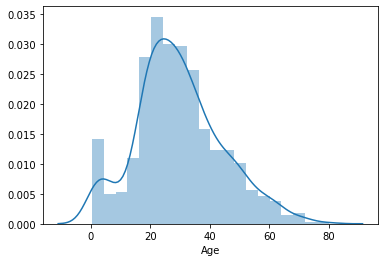

In [3]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

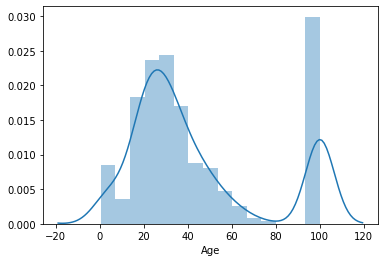

In [4]:
sns.distplot(df['Age'].fillna(100))

In [ ]:
##This particular data is Guassian distributed

Text(0, 0.5, 'No of passengers')

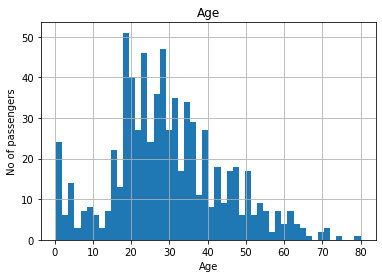

In [5]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

<AxesSubplot:xlabel='Age'>

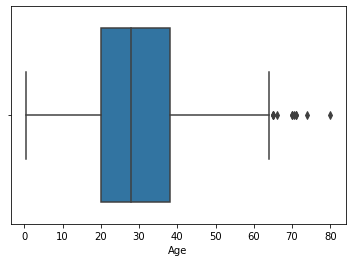

In [6]:
sns.boxplot(df['Age'])

In [7]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
# Assuming Age follow Guassian Distribution we will calculate boundaries which will differentiate the outliers
# After 3 standard Deviation everything is outliers
upper_boundary=df['Age'].mean()+3*df.Age.std()
upper_boundary

73.27860964406094

In [14]:
lower_boundary=df['Age'].mean()-3*df.Age.std()
lower_boundary

-13.880374349943303

In [17]:
#Let's compute the Inter-Quartile Range to calculate the boundaries
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [21]:
lower_bridge=df.Age.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Age.quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-6.6875
64.8125


In [22]:
# Extreme Value
lower_bridge=df.Age.quantile(0.25)-(IQR*3)
upper_bridge=df.Age.quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-33.5
91.625


Text(0, 0.5, 'No of passengers')

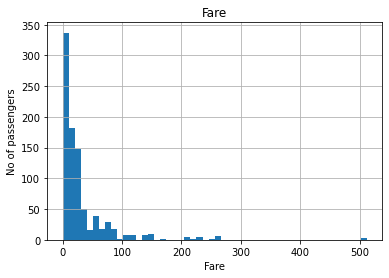

In [23]:
#What if your feature is skewed
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

<AxesSubplot:xlabel='Fare'>

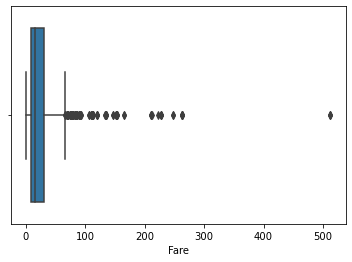

In [24]:
sns.boxplot(df['Fare'])

In [25]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
upper_boundary=df['Fare'].mean()+3*df.Fare.std()
lower_boundary=df['Fare'].mean()-3*df.Fare.std()
print(upper_boundary)
print(lower_boundary)

181.2844937601173
-116.87607782296804


In [31]:
lower_bridge=df.Fare.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Fare.quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-18.9021
57.8125


In [32]:
#Extreme Outliers
lower_bridge=df.Fare.quantile(0.25)-(IQR*3)
upper_bridge=df.Fare.quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-45.7146
84.625


In [33]:
data=df.copy()

In [38]:
data.loc[data['Age']>=73]=73

In [41]:
data.loc[data['Fare']>=100]=100

Text(0, 0.5, 'No of passengers')

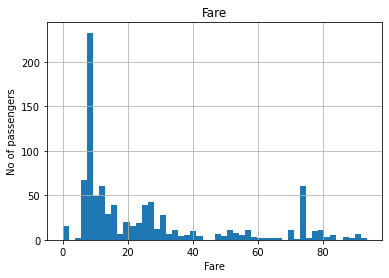

In [42]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

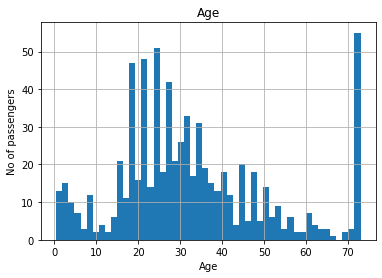

In [43]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')